# Day 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1943 MCP 뉴런

In [2]:
random = np.random.default_rng(1)
x = np.linspace(0.1, 1.1, 5)
w = random.normal(0, 1, size=x.shape)

z = np.dot(x, w)
print(f'z = {z:.2f}')

b = 0.3
y = 1 if z > b else -1
print(f'y = {y}')

pd.DataFrame({'x': x, 'w': w, 'wx': x * w}).round(2).T

z = 0.41
y = 1


,0,1,2,3,4
x,0.10,0.35,0.60,0.85,1.10
w,0.35,0.82,0.33,-1.30,0.91
wx,0.03,0.29,0.20,-1.11,1.00


In [3]:
def MCP뉴런(x, w, b):
    z = np.dot(x, w) + b
    y = 1 if z > 0 else -1
    return y

random = np.random.default_rng(1)
x = np.linspace(0.1, 1.1, 5)
w = random.normal(0, 1, size=x.shape)
b = 0.3 
y = MCP뉴런(x, w, b)
print(f'x={x.round(2)} -> f(x; w, b) = {y:}')

x=[0.1  0.35 0.6  0.85 1.1 ] -> f(x; w, b) = 1


## 논리 회로

In [4]:
def logic(w, b):
    for xi in np.array([(0, 0), (0, 1), (1, 0), (1, 1)]):
        yi = MCP뉴런(xi, w, b)
        print(f'x={xi} -> {yi if yi > 0 else 0}')

w_and = np.array([0.5, 0.5])
b_and = -0.7
print('AND')
logic(w_and, b_and)

AND
x=[0 0] -> 0
x=[0 1] -> 0
x=[1 0] -> 0
x=[1 1] -> 1


$$
\begin{aligned}
z &= w^{\top} x + b = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
\\
y &= 
\begin{cases}
+1 \quad z > 0 \\
-1 \quad z \leq 0
\end{cases}
\end{aligned}
$$

입력 벡터 $\mathbf{x} = \left(x_1, x_2\right)$ 경우,

$$
z = w_1 x_1 + w_2 x_2 + b
$$

결정경계 $z = 0$ 

$$
\begin{aligned}
0 &= w_1 x_1 + w_2 x_2 + b
\\
x_2 &= \frac{w_1}{-w_2} x_1 + \frac{b}{-w_2}
\end{aligned}
$$

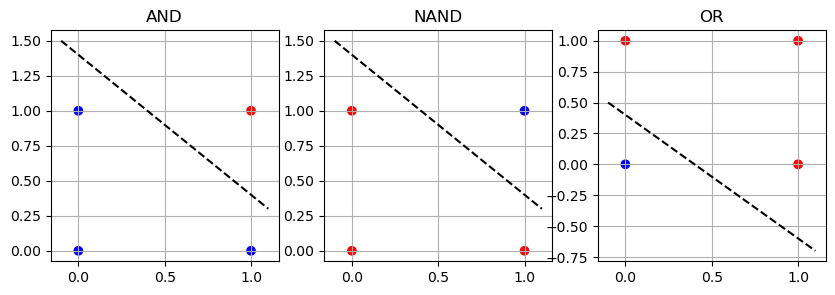

In [5]:
Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

plt.figure(figsize=(10, 3)) # 그림틀 크기 지정: 가로, 세로
plt.subplot(1, 3, 1) # 1행 3열 중 첫번째
y_and = np.array([0, 0, 0, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_and, cmap='bwr')
# 결정경계
z0 = lambda x, w, b: (w[0] * x + b) / -w[1]
x = np.linspace(-0.1, 1.1, 10)
plt.plot(x, z0(x, w_and, b_and), 'k--')
plt.title('AND')
plt.grid()
plt.subplot(1, 3, 2) # 1행 3열 중 두번째
y_nand = np.array([1, 1, 1, 0])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_nand, cmap='bwr')
plt.title('NAND')
w_nand = np.array([-0.5, -0.5]); b_nand = 0.7
plt.plot(x, z0(x, w_nand, b_nand), 'k--')
plt.grid()

plt.subplot(1, 3, 3) # 1행 3열 중 세번째
y_or = np.array([0, 1, 1, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_or, cmap='bwr')
plt.title('OR')
w_or = np.array([0.5, 0.5]); b_or = -0.2
plt.plot(x, z0(x, w_or, b_or), 'k--')
plt.grid()
# 결정경계
plt.show()

## 1958 퍼셉트론

In [13]:
samples = np.arange(10)

pd.DataFrame({
    'samples': samples,
    'x < 5': samples < 5,
    'np.where': np.where(samples < 5, 1, -1)
}).T

,0,1,2,3,4,5,6,7,8,9
samples,0,1,2,3,4,5,6,7,8,9
x < 5,True,True,True,True,True,False,False,False,False,False
np.where,1,1,1,1,1,-1,-1,-1,-1,-1


In [16]:
samples = np.random.default_rng(1).normal(0, 1, size=(3, 4))
print(samples.round(2))
print(np.where(samples > 0, 1, -1))

[[ 0.35  0.82  0.33 -1.3 ]
 [ 0.91  0.45 -0.54  0.58]
 [ 0.36  0.29  0.03  0.55]]
[[ 1  1  1 -1]
 [ 1  1 -1  1]
 [ 1  1  1  1]]


In [ ]:
from numpy import NAN


class 퍼셉트론:
    def __init__(self, w=None, b=None):
        self.w = w
        self.b = b

    def __call__(self, x):
        z = np.dot(x, self.w) + self.b
        y = np.where(z > 0, 1, -1)
        return y
    
    def fit(self, data, target, 학습횟수, 학습률=1.0):
        """학습 알고리즘"""
        표본수, 특성수 = data.shape
        # 매개변수 초기화
        self.w = np.zeros(특성수, dtype=np.float32)
        self.b = 0.0
        매개변수변화 = []
        for epoch in range(학습횟수):
            매개변수변화.apppend(np.append(self.b, self.w))
            # 각 표본별 오차 계산
            for xi, yi in zip(data, target):
                예측값 = self(xi)
                오차 = yi - 예측값
                갱신 = 오차 * 학습률
                self.w += 갱신 * xi
                self.b += 갱신
        
        return 매개변수변화

Xs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

AND = 퍼셉트론(w=np.array([0.5, 0.5]), b=-0.7)
y_and = np.array([-1, -1, -1, 1])
assert np.all(AND(Xs) == y_and)

NAND = 퍼셉트론(w=np.array([-0.5, -0.5]), b=0.7)
y_nand = np.array([1, 1, 1, -1])
assert np.all(NAND(Xs) == y_nand)

OR = 퍼셉트론(w=np.array([0.5, 0.5]), b=-0.2)
y_or = np.array([-1, 1, 1, 1])
assert np.all(OR(Xs) == y_or)

Q: 왜 이런 걸 알아야 할까요? 그냥 신경망으로 문제를 푸는데 집중할 수는 없나요?

In [22]:
import torch

layer1 = torch.nn.Linear(5, 4)
layer2 = torch.nn.Linear(4, 3)
layer3 = torch.nn.Linear(3, 2)
layer4 = torch.nn.Linear(2, 1)

Xs = torch.randn(6, 5)
z1 = layer1(Xs)
# torch.nn.Linear = X @ W^T + b
assert torch.allclose(z1, Xs @ layer1.weight.T + layer1.bias)

model = torch.nn.Sequential(
    layer1, torch.nn.ReLU(),
    layer2, torch.nn.ReLU(),
    layer3, torch.nn.ReLU(),
    layer4
)